In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
log_data = """
using cuda device.
using 100 images for training, 12 images for validation.
loss: 0.774 : 100%|██████████| 100/100 [04:43<00:00,  2.84s/it] 
100%|██████████| 12/12 [00:09<00:00,  1.28it/s]
Epoch:[1/60] train_loss: 0.959 valid_loss: 0.765 
Train--ET: 0.174 TC: 0.184 WT: 0.357 
Valid--ET: 0.395 TC: 0.395 WT: 0.640 
loss: 0.541 : 100%|██████████| 100/100 [03:09<00:00,  1.90s/it]
100%|██████████| 12/12 [00:09<00:00,  1.32it/s]
Epoch:[2/60] train_loss: 0.636 valid_loss: 0.532 
Train--ET: 0.501 TC: 0.465 WT: 0.694 
Valid--ET: 0.515 TC: 0.466 WT: 0.728 
loss: 0.511 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:08<00:00,  1.34it/s]
Epoch:[3/60] train_loss: 0.488 valid_loss: 0.424 
Train--ET: 0.562 TC: 0.516 WT: 0.707 
Valid--ET: 0.530 TC: 0.445 WT: 0.735 
loss: 0.272 : 100%|██████████| 100/100 [03:06<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.29it/s]
Epoch:[4/60] train_loss: 0.384 valid_loss: 0.319 
Train--ET: 0.604 TC: 0.556 WT: 0.723 
Valid--ET: 0.637 TC: 0.566 WT: 0.750 
loss: 0.499 : 100%|██████████| 100/100 [03:06<00:00,  1.87s/it]
100%|██████████| 12/12 [00:08<00:00,  1.36it/s]
Epoch:[5/60] train_loss: 0.317 valid_loss: 0.312 
Train--ET: 0.625 TC: 0.570 WT: 0.741 
Valid--ET: 0.501 TC: 0.566 WT: 0.754 
loss: 0.243 : 100%|██████████| 100/100 [03:05<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[6/60] train_loss: 0.278 valid_loss: 0.240 
Train--ET: 0.639 TC: 0.582 WT: 0.760 
Valid--ET: 0.662 TC: 0.598 WT: 0.803 
loss: 0.164 : 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.33it/s]
Epoch:[7/60] train_loss: 0.256 valid_loss: 0.251 
Train--ET: 0.623 TC: 0.567 WT: 0.776 
Valid--ET: 0.665 TC: 0.581 WT: 0.811 
loss: 0.503 : 100%|██████████| 100/100 [03:05<00:00,  1.85s/it]
100%|██████████| 12/12 [00:08<00:00,  1.36it/s]
Epoch:[8/60] train_loss: 0.246 valid_loss: 0.235 
Train--ET: 0.656 TC: 0.599 WT: 0.778 
Valid--ET: 0.672 TC: 0.616 WT: 0.774 
loss: 0.315 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.31it/s]
Epoch:[9/60] train_loss: 0.239 valid_loss: 0.237 
Train--ET: 0.661 TC: 0.597 WT: 0.786 
Valid--ET: 0.652 TC: 0.581 WT: 0.788 
loss: 0.178 : 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.29it/s]
Epoch:[10/60] train_loss: 0.220 valid_loss: 0.238 
Train--ET: 0.674 TC: 0.617 WT: 0.815 
Valid--ET: 0.670 TC: 0.593 WT: 0.825 
loss: 0.188 : 100%|██████████| 100/100 [03:05<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.28it/s]
Epoch:[11/60] train_loss: 0.221 valid_loss: 0.232 
Train--ET: 0.673 TC: 0.636 WT: 0.814 
Valid--ET: 0.662 TC: 0.645 WT: 0.793 
loss: 0.326 : 100%|██████████| 100/100 [03:04<00:00,  1.84s/it]
100%|██████████| 12/12 [00:09<00:00,  1.27it/s]
Epoch:[12/60] train_loss: 0.210 valid_loss: 0.219 
Train--ET: 0.688 TC: 0.645 WT: 0.830 
Valid--ET: 0.652 TC: 0.595 WT: 0.844 
loss: 0.288 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.32it/s]
Epoch:[13/60] train_loss: 0.203 valid_loss: 0.254 
Train--ET: 0.692 TC: 0.662 WT: 0.847 
Valid--ET: 0.655 TC: 0.478 WT: 0.831 
loss: 0.159 : 100%|██████████| 100/100 [03:04<00:00,  1.84s/it]
100%|██████████| 12/12 [00:09<00:00,  1.33it/s]
Epoch:[14/60] train_loss: 0.199 valid_loss: 0.189 
Train--ET: 0.686 TC: 0.667 WT: 0.846 
Valid--ET: 0.696 TC: 0.679 WT: 0.855 
loss: 0.143 : 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.29it/s]
Epoch:[15/60] train_loss: 0.184 valid_loss: 0.176 
Train--ET: 0.712 TC: 0.696 WT: 0.857 
Valid--ET: 0.690 TC: 0.681 WT: 0.877 
loss: 0.069 : 100%|██████████| 100/100 [03:07<00:00,  1.87s/it]
100%|██████████| 12/12 [00:09<00:00,  1.27it/s]
Epoch:[16/60] train_loss: 0.179 valid_loss: 0.199 
Train--ET: 0.700 TC: 0.697 WT: 0.863 
Valid--ET: 0.643 TC: 0.616 WT: 0.876 
loss: 0.277 : 100%|██████████| 100/100 [03:06<00:00,  1.87s/it]
100%|██████████| 12/12 [00:09<00:00,  1.29it/s]
Epoch:[17/60] train_loss: 0.181 valid_loss: 0.179 
Train--ET: 0.709 TC: 0.701 WT: 0.853 
Valid--ET: 0.705 TC: 0.711 WT: 0.857 
loss: 0.109 : 100%|██████████| 100/100 [03:07<00:00,  1.88s/it]
100%|██████████| 12/12 [00:09<00:00,  1.33it/s]
Epoch:[18/60] train_loss: 0.183 valid_loss: 0.176 
Train--ET: 0.702 TC: 0.706 WT: 0.839 
Valid--ET: 0.691 TC: 0.687 WT: 0.877 
loss: 0.306 : 100%|██████████| 100/100 [03:04<00:00,  1.84s/it]
100%|██████████| 12/12 [00:08<00:00,  1.35it/s]
Epoch:[19/60] train_loss: 0.179 valid_loss: 0.206 
Train--ET: 0.689 TC: 0.705 WT: 0.840 
Valid--ET: 0.717 TC: 0.689 WT: 0.816 
loss: 0.075 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:08<00:00,  1.34it/s]
Epoch:[20/60] train_loss: 0.172 valid_loss: 0.174 
Train--ET: 0.710 TC: 0.735 WT: 0.853 
Valid--ET: 0.696 TC: 0.706 WT: 0.866 
loss: 0.173 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.28it/s]
Epoch:[21/60] train_loss: 0.170 valid_loss: 0.189 
Train--ET: 0.711 TC: 0.730 WT: 0.868 
Valid--ET: 0.760 TC: 0.681 WT: 0.855 
loss: 0.066 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.31it/s]
Epoch:[22/60] train_loss: 0.168 valid_loss: 0.210 
Train--ET: 0.697 TC: 0.714 WT: 0.854 
Valid--ET: 0.672 TC: 0.626 WT: 0.843 
loss: 0.084 : 100%|██████████| 100/100 [03:04<00:00,  1.84s/it]
100%|██████████| 12/12 [00:09<00:00,  1.26it/s]
Epoch:[23/60] train_loss: 0.166 valid_loss: 0.189 
Train--ET: 0.700 TC: 0.714 WT: 0.861 
Valid--ET: 0.689 TC: 0.665 WT: 0.846 
loss: 0.190 : 100%|██████████| 100/100 [03:06<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.25it/s]
Epoch:[24/60] train_loss: 0.149 valid_loss: 0.231 
Train--ET: 0.728 TC: 0.758 WT: 0.874 
Valid--ET: 0.752 TC: 0.601 WT: 0.817 
loss: 0.244 : 100%|██████████| 100/100 [03:05<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[25/60] train_loss: 0.141 valid_loss: 0.190 
Train--ET: 0.735 TC: 0.766 WT: 0.886 
Valid--ET: 0.781 TC: 0.672 WT: 0.836 
loss: 0.198 : 100%|██████████| 100/100 [03:06<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.25it/s]
Epoch:[27/60] train_loss: 0.144 valid_loss: 0.179 
Train--ET: 0.733 TC: 0.770 WT: 0.877 
Valid--ET: 0.698 TC: 0.673 WT: 0.856 
loss: 0.218 : 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.28it/s]
Epoch:[28/60] train_loss: 0.131 valid_loss: 0.162 
Train--ET: 0.736 TC: 0.781 WT: 0.885 
Valid--ET: 0.718 TC: 0.726 WT: 0.887 
loss: 0.083 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.26it/s]
Epoch:[29/60] train_loss: 0.142 valid_loss: 0.157 
Train--ET: 0.706 TC: 0.741 WT: 0.881 
Valid--ET: 0.705 TC: 0.720 WT: 0.884 
loss: 0.039 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[30/60] train_loss: 0.146 valid_loss: 0.162 
Train--ET: 0.739 TC: 0.767 WT: 0.856 
Valid--ET: 0.730 TC: 0.728 WT: 0.871 
loss: 0.058 : 100%|██████████| 100/100 [03:06<00:00,  1.87s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[31/60] train_loss: 0.130 valid_loss: 0.170 
Train--ET: 0.749 TC: 0.796 WT: 0.889 
Valid--ET: 0.715 TC: 0.708 WT: 0.866 
loss: 0.049 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.27it/s]
Epoch:[33/60] train_loss: 0.128 valid_loss: 0.157 
Train--ET: 0.751 TC: 0.802 WT: 0.900 
Valid--ET: 0.727 TC: 0.713 WT: 0.890 
loss: 0.207 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:10<00:00,  1.19it/s]
Epoch:[35/60] train_loss: 0.135 valid_loss: 0.188 
Train--ET: 0.726 TC: 0.774 WT: 0.874 
Valid--ET: 0.736 TC: 0.648 WT: 0.849 
loss: 0.113 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.31it/s]
Epoch:[36/60] train_loss: 0.121 valid_loss: 0.150 
Train--ET: 0.759 TC: 0.801 WT: 0.895 
Valid--ET: 0.728 TC: 0.740 WT: 0.885 
loss: 0.046 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.29it/s]
Epoch:[37/60] train_loss: 0.128 valid_loss: 0.160 
Train--ET: 0.743 TC: 0.790 WT: 0.880 
Valid--ET: 0.732 TC: 0.710 WT: 0.891 
loss: 0.158 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.29it/s]
Epoch:[38/60] train_loss: 0.126 valid_loss: 0.143 
Train--ET: 0.758 TC: 0.808 WT: 0.880 
Valid--ET: 0.723 TC: 0.745 WT: 0.901 
loss: 0.056 : 100%|██████████| 100/100 [03:05<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.31it/s]
Epoch:[39/60] train_loss: 0.121 valid_loss: 0.149 
Train--ET: 0.756 TC: 0.806 WT: 0.887 
Valid--ET: 0.714 TC: 0.731 WT: 0.892 
loss: 0.073 : 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]
100%|██████████| 12/12 [00:08<00:00,  1.35it/s]
Epoch:[40/60] train_loss: 0.111 valid_loss: 0.139 
Train--ET: 0.761 TC: 0.817 WT: 0.908 
Valid--ET: 0.725 TC: 0.752 WT: 0.905 
loss: 0.093 : 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.24it/s]
Epoch:[41/60] train_loss: 0.124 valid_loss: 0.138 
Train--ET: 0.753 TC: 0.805 WT: 0.879 
Valid--ET: 0.734 TC: 0.769 WT: 0.907 
loss: 0.120 : 100%|██████████| 100/100 [03:04<00:00,  1.84s/it]
100%|██████████| 12/12 [00:09<00:00,  1.32it/s]
Epoch:[42/60] train_loss: 0.116 valid_loss: 0.161 
Train--ET: 0.744 TC: 0.803 WT: 0.891 
Valid--ET: 0.723 TC: 0.723 WT: 0.872 
loss: 0.216 : 100%|██████████| 100/100 [03:06<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.31it/s]
Epoch:[43/60] train_loss: 0.109 valid_loss: 0.150 
Train--ET: 0.758 TC: 0.822 WT: 0.908 
Valid--ET: 0.737 TC: 0.721 WT: 0.903 
loss: 0.030 : 100%|██████████| 100/100 [03:06<00:00,  1.86s/it]
100%|██████████| 12/12 [00:08<00:00,  1.36it/s]
Epoch:[44/60] train_loss: 0.118 valid_loss: 0.141 
Train--ET: 0.753 TC: 0.801 WT: 0.897 
Valid--ET: 0.720 TC: 0.765 WT: 0.898 
loss: 0.112 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.27it/s]
Epoch:[45/60] train_loss: 0.114 valid_loss: 0.150 
Train--ET: 0.741 TC: 0.793 WT: 0.902 
Valid--ET: 0.727 TC: 0.731 WT: 0.902 
loss: 0.079 : 100%|██████████| 100/100 [03:05<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.28it/s]
Epoch:[46/60] train_loss: 0.107 valid_loss: 0.172 
Train--ET: 0.771 TC: 0.827 WT: 0.909 
Valid--ET: 0.810 TC: 0.685 WT: 0.859 
loss: 0.113 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.23it/s]
Epoch:[47/60] train_loss: 0.109 valid_loss: 0.136 
Train--ET: 0.759 TC: 0.808 WT: 0.908 
Valid--ET: 0.743 TC: 0.747 WT: 0.908 
loss: 0.088 : 100%|██████████| 100/100 [03:04<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.23it/s]
Epoch:[48/60] train_loss: 0.112 valid_loss: 0.157 
Train--ET: 0.753 TC: 0.817 WT: 0.899 
Valid--ET: 0.725 TC: 0.714 WT: 0.877 
loss: 0.028 : 100%|██████████| 100/100 [03:06<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.24it/s]
Epoch:[49/60] train_loss: 0.111 valid_loss: 0.138 
Train--ET: 0.761 TC: 0.812 WT: 0.899 
Valid--ET: 0.720 TC: 0.770 WT: 0.905 
loss: 0.194 : 100%|██████████| 100/100 [03:05<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.31it/s]
Epoch:[51/60] train_loss: 0.109 valid_loss: 0.143 
Train--ET: 0.774 TC: 0.831 WT: 0.906 
Valid--ET: 0.738 TC: 0.735 WT: 0.902 
loss: 0.041 : 100%|██████████| 100/100 [03:04<00:00,  1.84s/it]
100%|██████████| 12/12 [00:09<00:00,  1.27it/s]
Epoch:[52/60] train_loss: 0.113 valid_loss: 0.140 
Train--ET: 0.773 TC: 0.828 WT: 0.889 
Valid--ET: 0.737 TC: 0.753 WT: 0.904 
loss: 0.050 : 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.23it/s]
Epoch:[53/60] train_loss: 0.103 valid_loss: 0.151 
Train--ET: 0.769 TC: 0.827 WT: 0.911 
Valid--ET: 0.730 TC: 0.716 WT: 0.896 
loss: 0.098 : 100%|██████████| 100/100 [03:05<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.30it/s]
Epoch:[54/60] train_loss: 0.121 valid_loss: 0.147 
Train--ET: 0.769 TC: 0.834 WT: 0.881 
Valid--ET: 0.718 TC: 0.729 WT: 0.897 
loss: 0.108 : 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.27it/s]
Epoch:[55/60] train_loss: 0.110 valid_loss: 0.154 
Train--ET: 0.788 TC: 0.831 WT: 0.905 
Valid--ET: 0.734 TC: 0.732 WT: 0.881 
loss: 0.105 : 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.28it/s]
Epoch:[56/60] train_loss: 0.113 valid_loss: 0.143 
Train--ET: 0.762 TC: 0.823 WT: 0.903 
Valid--ET: 0.727 TC: 0.737 WT: 0.899 
loss: 0.096 : 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.23it/s]
Epoch:[57/60] train_loss: 0.102 valid_loss: 0.153 
Train--ET: 0.766 TC: 0.830 WT: 0.913 
Valid--ET: 0.739 TC: 0.729 WT: 0.882 
loss: 0.103 : 100%|██████████| 100/100 [03:06<00:00,  1.87s/it]
100%|██████████| 12/12 [00:09<00:00,  1.26it/s]
Epoch:[58/60] train_loss: 0.103 valid_loss: 0.137 
Train--ET: 0.784 TC: 0.842 WT: 0.908 
Valid--ET: 0.742 TC: 0.747 WT: 0.913 
loss: 0.164 : 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]
100%|██████████| 12/12 [00:09<00:00,  1.29it/s]
Epoch:[59/60] train_loss: 0.097 valid_loss: 0.148 
Train--ET: 0.770 TC: 0.833 WT: 0.917 
Valid--ET: 0.730 TC: 0.721 WT: 0.904 
loss: 0.172 : 100%|██████████| 100/100 [03:05<00:00,  1.85s/it]
100%|██████████| 12/12 [00:09<00:00,  1.31it/s]
Epoch:[60/60] train_loss: 0.097 valid_loss: 0.134 
Train--ET: 0.773 TC: 0.835 WT: 0.916 
Valid--ET: 0.736 TC: 0.755 WT: 0.918 
Finished Training!
100%|██████████| 12/12 [00:09<00:00,  1.23it/s]
100%|██████████| 13/13 [00:10<00:00,  1.29it/s]
Valid -- loss: 0.134 ET: 0.736 TC: 0.755 WT: 0.918
Test  -- loss: 0.142 ET: 0.821 TC: 0.827 WT: 0.916
"""

In [1]:
log_data = """
using cuda device.
using 100 images for training, 12 images for validation.
Let's use 2 GPUs!
loss: 0.839 : 100%|██████████| 100/100 [03:25<00:00,  2.05s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[1/60] train_loss: 1.037 valid_loss: 0.822 
Train--ET: 0.018 TC: 0.162 WT: 0.268 
Valid--ET: 0.037 TC: 0.378 WT: 0.610 
loss: 0.552 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[2/60] train_loss: 0.691 valid_loss: 0.581 
Train--ET: 0.012 TC: 0.477 WT: 0.683 
Valid--ET: 0.113 TC: 0.589 WT: 0.730 
loss: 0.605 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[3/60] train_loss: 0.525 valid_loss: 0.430 
Train--ET: 0.163 TC: 0.498 WT: 0.724 
Valid--ET: 0.511 TC: 0.601 WT: 0.756 
loss: 0.568 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.24it/s]
Epoch:[4/60] train_loss: 0.411 valid_loss: 0.365 
Train--ET: 0.419 TC: 0.534 WT: 0.738 
Valid--ET: 0.601 TC: 0.656 WT: 0.689 
loss: 0.164 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.23it/s]
Epoch:[5/60] train_loss: 0.318 valid_loss: 0.289 
Train--ET: 0.541 TC: 0.572 WT: 0.769 
Valid--ET: 0.601 TC: 0.678 WT: 0.793 
loss: 0.166 : 100%|██████████| 100/100 [03:22<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[6/60] train_loss: 0.278 valid_loss: 0.295 
Train--ET: 0.587 TC: 0.578 WT: 0.770 
Valid--ET: 0.596 TC: 0.635 WT: 0.723 
loss: 0.458 : 100%|██████████| 100/100 [03:25<00:00,  2.05s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[7/60] train_loss: 0.251 valid_loss: 0.288 
Train--ET: 0.611 TC: 0.579 WT: 0.786 
Valid--ET: 0.690 TC: 0.602 WT: 0.774 
loss: 0.169 : 100%|██████████| 100/100 [03:24<00:00,  2.05s/it]
100%|██████████| 12/12 [00:09<00:00,  1.26it/s]
Epoch:[8/60] train_loss: 0.239 valid_loss: 0.394 
Train--ET: 0.610 TC: 0.572 WT: 0.792 
Valid--ET: 0.261 TC: 0.222 WT: 0.715 
loss: 0.321 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[9/60] train_loss: 0.226 valid_loss: 0.302 
Train--ET: 0.589 TC: 0.559 WT: 0.810 
Valid--ET: 0.664 TC: 0.651 WT: 0.681 
loss: 0.189 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.25it/s]
Epoch:[10/60] train_loss: 0.233 valid_loss: 0.235 
Train--ET: 0.602 TC: 0.576 WT: 0.798 
Valid--ET: 0.694 TC: 0.694 WT: 0.782 
loss: 0.169 : 100%|██████████| 100/100 [03:22<00:00,  2.02s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[11/60] train_loss: 0.228 valid_loss: 0.296 
Train--ET: 0.634 TC: 0.608 WT: 0.794 
Valid--ET: 0.596 TC: 0.580 WT: 0.717 
loss: 0.201 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.20it/s]
Epoch:[12/60] train_loss: 0.234 valid_loss: 0.289 
Train--ET: 0.645 TC: 0.646 WT: 0.781 
Valid--ET: 0.686 TC: 0.653 WT: 0.739 
loss: 0.155 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.25it/s]
Epoch:[13/60] train_loss: 0.220 valid_loss: 0.327 
Train--ET: 0.654 TC: 0.626 WT: 0.816 
Valid--ET: 0.534 TC: 0.485 WT: 0.676 
loss: 0.139 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[14/60] train_loss: 0.205 valid_loss: 0.286 
Train--ET: 0.663 TC: 0.650 WT: 0.819 
Valid--ET: 0.640 TC: 0.578 WT: 0.752 
loss: 0.095 : 100%|██████████| 100/100 [03:22<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[15/60] train_loss: 0.190 valid_loss: 0.255 
Train--ET: 0.688 TC: 0.691 WT: 0.842 
Valid--ET: 0.677 TC: 0.665 WT: 0.742 
loss: 0.197 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:10<00:00,  1.15it/s]
Epoch:[16/60] train_loss: 0.186 valid_loss: 0.187 
Train--ET: 0.674 TC: 0.677 WT: 0.845 
Valid--ET: 0.784 TC: 0.768 WT: 0.836 
loss: 0.089 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[17/60] train_loss: 0.177 valid_loss: 0.238 
Train--ET: 0.690 TC: 0.710 WT: 0.848 
Valid--ET: 0.669 TC: 0.653 WT: 0.772 
loss: 0.192 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[18/60] train_loss: 0.175 valid_loss: 0.300 
Train--ET: 0.694 TC: 0.715 WT: 0.853 
Valid--ET: 0.611 TC: 0.601 WT: 0.667 
loss: 0.302 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[19/60] train_loss: 0.198 valid_loss: 0.283 
Train--ET: 0.660 TC: 0.655 WT: 0.827 
Valid--ET: 0.678 TC: 0.656 WT: 0.704 
loss: 0.080 : 100%|██████████| 100/100 [03:24<00:00,  2.05s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[20/60] train_loss: 0.178 valid_loss: 0.200 
Train--ET: 0.698 TC: 0.709 WT: 0.844 
Valid--ET: 0.752 TC: 0.737 WT: 0.795 
loss: 0.125 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:10<00:00,  1.15it/s]
Epoch:[21/60] train_loss: 0.166 valid_loss: 0.305 
Train--ET: 0.697 TC: 0.714 WT: 0.853 
Valid--ET: 0.619 TC: 0.613 WT: 0.732 
loss: 0.168 : 100%|██████████| 100/100 [03:25<00:00,  2.06s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[22/60] train_loss: 0.165 valid_loss: 0.212 
Train--ET: 0.703 TC: 0.723 WT: 0.861 
Valid--ET: 0.787 TC: 0.735 WT: 0.815 
loss: 0.129 : 100%|██████████| 100/100 [03:22<00:00,  2.02s/it]
100%|██████████| 12/12 [00:10<00:00,  1.20it/s]
Epoch:[23/60] train_loss: 0.158 valid_loss: 0.212 
Train--ET: 0.710 TC: 0.739 WT: 0.868 
Valid--ET: 0.745 TC: 0.740 WT: 0.784 
loss: 0.113 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.20it/s]
Epoch:[24/60] train_loss: 0.153 valid_loss: 0.277 
Train--ET: 0.731 TC: 0.750 WT: 0.867 
Valid--ET: 0.665 TC: 0.660 WT: 0.687 
loss: 0.274 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[25/60] train_loss: 0.164 valid_loss: 0.233 
Train--ET: 0.697 TC: 0.732 WT: 0.847 
Valid--ET: 0.717 TC: 0.691 WT: 0.771 
loss: 0.405 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:10<00:00,  1.14it/s]
Epoch:[26/60] train_loss: 0.151 valid_loss: 0.149 
Train--ET: 0.721 TC: 0.760 WT: 0.870 
Valid--ET: 0.807 TC: 0.825 WT: 0.844 
loss: 0.443 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:10<00:00,  1.19it/s]
Epoch:[27/60] train_loss: 0.145 valid_loss: 0.232 
Train--ET: 0.720 TC: 0.762 WT: 0.876 
Valid--ET: 0.689 TC: 0.715 WT: 0.748 
loss: 0.147 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.25it/s]
Epoch:[28/60] train_loss: 0.144 valid_loss: 0.214 
Train--ET: 0.710 TC: 0.744 WT: 0.877 
Valid--ET: 0.757 TC: 0.705 WT: 0.802 
loss: 0.120 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[29/60] train_loss: 0.134 valid_loss: 0.198 
Train--ET: 0.732 TC: 0.776 WT: 0.890 
Valid--ET: 0.725 TC: 0.745 WT: 0.797 
loss: 0.084 : 100%|██████████| 100/100 [03:22<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[30/60] train_loss: 0.139 valid_loss: 0.270 
Train--ET: 0.729 TC: 0.760 WT: 0.879 
Valid--ET: 0.684 TC: 0.616 WT: 0.750 
loss: 0.087 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[31/60] train_loss: 0.139 valid_loss: 0.211 
Train--ET: 0.707 TC: 0.731 WT: 0.887 
Valid--ET: 0.709 TC: 0.722 WT: 0.767 
loss: 0.329 : 100%|██████████| 100/100 [03:25<00:00,  2.05s/it]
100%|██████████| 12/12 [00:10<00:00,  1.19it/s]
Epoch:[32/60] train_loss: 0.137 valid_loss: 0.196 
Train--ET: 0.720 TC: 0.761 WT: 0.887 
Valid--ET: 0.744 TC: 0.752 WT: 0.789 
loss: 0.051 : 100%|██████████| 100/100 [03:26<00:00,  2.06s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[33/60] train_loss: 0.129 valid_loss: 0.179 
Train--ET: 0.746 TC: 0.781 WT: 0.891 
Valid--ET: 0.776 TC: 0.790 WT: 0.806 
loss: 0.328 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.23it/s]
Epoch:[34/60] train_loss: 0.144 valid_loss: 0.267 
Train--ET: 0.721 TC: 0.767 WT: 0.860 
Valid--ET: 0.607 TC: 0.684 WT: 0.753 
loss: 0.087 : 100%|██████████| 100/100 [03:24<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.20it/s]
Epoch:[35/60] train_loss: 0.131 valid_loss: 0.203 
Train--ET: 0.735 TC: 0.774 WT: 0.886 
Valid--ET: 0.726 TC: 0.744 WT: 0.787 
loss: 0.121 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[37/60] train_loss: 0.122 valid_loss: 0.161 
Train--ET: 0.757 TC: 0.806 WT: 0.892 
Valid--ET: 0.793 TC: 0.812 WT: 0.832 
loss: 0.116 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.23it/s]
Epoch:[38/60] train_loss: 0.119 valid_loss: 0.128 
Train--ET: 0.755 TC: 0.813 WT: 0.897 
Valid--ET: 0.811 TC: 0.848 WT: 0.868 
loss: 0.086 : 100%|██████████| 100/100 [03:22<00:00,  2.02s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[39/60] train_loss: 0.115 valid_loss: 0.219 
Train--ET: 0.755 TC: 0.819 WT: 0.898 
Valid--ET: 0.688 TC: 0.690 WT: 0.757 
loss: 0.070 : 100%|██████████| 100/100 [03:22<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[40/60] train_loss: 0.125 valid_loss: 0.238 
Train--ET: 0.744 TC: 0.806 WT: 0.892 
Valid--ET: 0.659 TC: 0.670 WT: 0.740 
loss: 0.067 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:10<00:00,  1.17it/s]
Epoch:[41/60] train_loss: 0.119 valid_loss: 0.175 
Train--ET: 0.743 TC: 0.797 WT: 0.893 
Valid--ET: 0.760 TC: 0.795 WT: 0.805 
loss: 0.080 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[42/60] train_loss: 0.113 valid_loss: 0.125 
Train--ET: 0.765 TC: 0.832 WT: 0.902 
Valid--ET: 0.821 TC: 0.855 WT: 0.853 
loss: 0.104 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.20it/s]
Epoch:[43/60] train_loss: 0.112 valid_loss: 0.207 
Train--ET: 0.782 TC: 0.823 WT: 0.904 
Valid--ET: 0.788 TC: 0.723 WT: 0.831 
loss: 0.195 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[44/60] train_loss: 0.135 valid_loss: 0.163 
Train--ET: 0.734 TC: 0.758 WT: 0.874 
Valid--ET: 0.800 TC: 0.807 WT: 0.834 
loss: 0.158 : 100%|██████████| 100/100 [03:22<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.23it/s]
Epoch:[45/60] train_loss: 0.132 valid_loss: 0.164 
Train--ET: 0.746 TC: 0.792 WT: 0.876 
Valid--ET: 0.781 TC: 0.810 WT: 0.824 
loss: 0.115 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[46/60] train_loss: 0.115 valid_loss: 0.210 
Train--ET: 0.752 TC: 0.800 WT: 0.899 
Valid--ET: 0.738 TC: 0.714 WT: 0.792 
loss: 0.128 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:10<00:00,  1.20it/s]
Epoch:[47/60] train_loss: 0.116 valid_loss: 0.170 
Train--ET: 0.775 TC: 0.803 WT: 0.908 
Valid--ET: 0.763 TC: 0.782 WT: 0.812 
loss: 0.146 : 100%|██████████| 100/100 [03:22<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[48/60] train_loss: 0.112 valid_loss: 0.196 
Train--ET: 0.767 TC: 0.803 WT: 0.906 
Valid--ET: 0.731 TC: 0.742 WT: 0.777 
loss: 0.180 : 100%|██████████| 100/100 [03:26<00:00,  2.06s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[49/60] train_loss: 0.106 valid_loss: 0.150 
Train--ET: 0.773 TC: 0.837 WT: 0.903 
Valid--ET: 0.822 TC: 0.848 WT: 0.828 
loss: 0.073 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[50/60] train_loss: 0.119 valid_loss: 0.213 
Train--ET: 0.754 TC: 0.806 WT: 0.891 
Valid--ET: 0.700 TC: 0.718 WT: 0.751 
loss: 0.072 : 100%|██████████| 100/100 [03:25<00:00,  2.05s/it]
100%|██████████| 12/12 [00:10<00:00,  1.18it/s]
Epoch:[51/60] train_loss: 0.105 valid_loss: 0.192 
Train--ET: 0.761 TC: 0.826 WT: 0.909 
Valid--ET: 0.740 TC: 0.756 WT: 0.785 
loss: 0.057 : 100%|██████████| 100/100 [03:24<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.23it/s]
Epoch:[52/60] train_loss: 0.102 valid_loss: 0.164 
Train--ET: 0.769 TC: 0.837 WT: 0.910 
Valid--ET: 0.779 TC: 0.804 WT: 0.819 
loss: 0.093 : 100%|██████████| 100/100 [03:22<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[53/60] train_loss: 0.109 valid_loss: 0.142 
Train--ET: 0.768 TC: 0.806 WT: 0.906 
Valid--ET: 0.801 TC: 0.826 WT: 0.837 
loss: 0.078 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.22it/s]
Epoch:[54/60] train_loss: 0.112 valid_loss: 0.226 
Train--ET: 0.758 TC: 0.820 WT: 0.895 
Valid--ET: 0.676 TC: 0.683 WT: 0.744 
loss: 0.140 : 100%|██████████| 100/100 [03:23<00:00,  2.03s/it]
100%|██████████| 12/12 [00:09<00:00,  1.25it/s]
Epoch:[55/60] train_loss: 0.105 valid_loss: 0.158 
Train--ET: 0.765 TC: 0.838 WT: 0.901 
Valid--ET: 0.776 TC: 0.802 WT: 0.830 
loss: 0.030 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:10<00:00,  1.17it/s]
Epoch:[56/60] train_loss: 0.106 valid_loss: 0.121 
Train--ET: 0.748 TC: 0.820 WT: 0.902 
Valid--ET: 0.830 TC: 0.857 WT: 0.862 
loss: 0.168 : 100%|██████████| 100/100 [03:25<00:00,  2.05s/it]
100%|██████████| 12/12 [00:09<00:00,  1.23it/s]
Epoch:[57/60] train_loss: 0.111 valid_loss: 0.126 
Train--ET: 0.756 TC: 0.814 WT: 0.902 
Valid--ET: 0.805 TC: 0.831 WT: 0.865 
loss: 0.119 : 100%|██████████| 100/100 [03:24<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.20it/s]
Epoch:[58/60] train_loss: 0.104 valid_loss: 0.147 
Train--ET: 0.768 TC: 0.835 WT: 0.908 
Valid--ET: 0.798 TC: 0.821 WT: 0.831 
loss: 0.096 : 100%|██████████| 100/100 [03:24<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
Epoch:[59/60] train_loss: 0.110 valid_loss: 0.192 
Train--ET: 0.760 TC: 0.825 WT: 0.902 
Valid--ET: 0.739 TC: 0.761 WT: 0.775 
loss: 0.095 : 100%|██████████| 100/100 [03:23<00:00,  2.04s/it]
100%|██████████| 12/12 [00:09<00:00,  1.20it/s]
Epoch:[60/60] train_loss: 0.112 valid_loss: 0.134 
Train--ET: 0.755 TC: 0.821 WT: 0.891 
Valid--ET: 0.811 TC: 0.846 WT: 0.844 
Finished Training!
100%|██████████| 12/12 [00:09<00:00,  1.21it/s]
100%|██████████| 13/13 [00:10<00:00,  1.20it/s]
Valid -- loss: 0.134 ET: 0.811 TC: 0.846 WT: 0.844
Test  -- loss: 0.122 ET: 0.826 TC: 0.842 WT: 0.879
"""

In [2]:
pattern = r"train_loss: (\d+\.\d+) valid_loss: (\d+\.\d+) \nTrain--ET: (\d+\.\d+) TC: (\d+\.\d+) WT: (\d+\.\d+) \nValid--ET: (\d+\.\d+) TC: (\d+\.\d+) WT: (\d+\.\d+)"

train_losses = []
valid_losses = []
train_ET = []
train_TC = []
train_WT = []
valid_ET = []
valid_TC = []
valid_WT = []

matches = re.findall(pattern, log_data)
for match in matches:
    train_losses.append(float(match[0]))
    valid_losses.append(float(match[1]))
    train_ET.append(float(match[2]))
    train_TC.append(float(match[3]))
    train_WT.append(float(match[4]))
    valid_ET.append(float(match[5]))
    valid_TC.append(float(match[6]))
    valid_WT.append(float(match[7]))

print("Train Losses:", train_losses)
print("Valid Losses:", valid_losses)
print("Training Epoch Times:", train_ET)
print("Training TCs:", train_TC)
print("Training WT:", train_WT)
print("Validation Epoch Times:", valid_ET)
print("Validation TCs:", valid_TC)
print("Validation WT:", valid_WT)

Train Losses: [1.037, 0.691, 0.525, 0.411, 0.318, 0.278, 0.251, 0.239, 0.226, 0.233, 0.228, 0.234, 0.22, 0.205, 0.19, 0.186, 0.177, 0.175, 0.198, 0.178, 0.166, 0.165, 0.158, 0.153, 0.164, 0.151, 0.145, 0.144, 0.134, 0.139, 0.139, 0.137, 0.129, 0.144, 0.131, 0.122, 0.119, 0.115, 0.125, 0.119, 0.113, 0.112, 0.135, 0.132, 0.115, 0.116, 0.112, 0.106, 0.119, 0.105, 0.102, 0.109, 0.112, 0.105, 0.106, 0.111, 0.104, 0.11, 0.112]
Valid Losses: [0.822, 0.581, 0.43, 0.365, 0.289, 0.295, 0.288, 0.394, 0.302, 0.235, 0.296, 0.289, 0.327, 0.286, 0.255, 0.187, 0.238, 0.3, 0.283, 0.2, 0.305, 0.212, 0.212, 0.277, 0.233, 0.149, 0.232, 0.214, 0.198, 0.27, 0.211, 0.196, 0.179, 0.267, 0.203, 0.161, 0.128, 0.219, 0.238, 0.175, 0.125, 0.207, 0.163, 0.164, 0.21, 0.17, 0.196, 0.15, 0.213, 0.192, 0.164, 0.142, 0.226, 0.158, 0.121, 0.126, 0.147, 0.192, 0.134]
Training Epoch Times: [0.018, 0.012, 0.163, 0.419, 0.541, 0.587, 0.611, 0.61, 0.589, 0.602, 0.634, 0.645, 0.654, 0.663, 0.688, 0.674, 0.69, 0.694, 0.66, 0.6

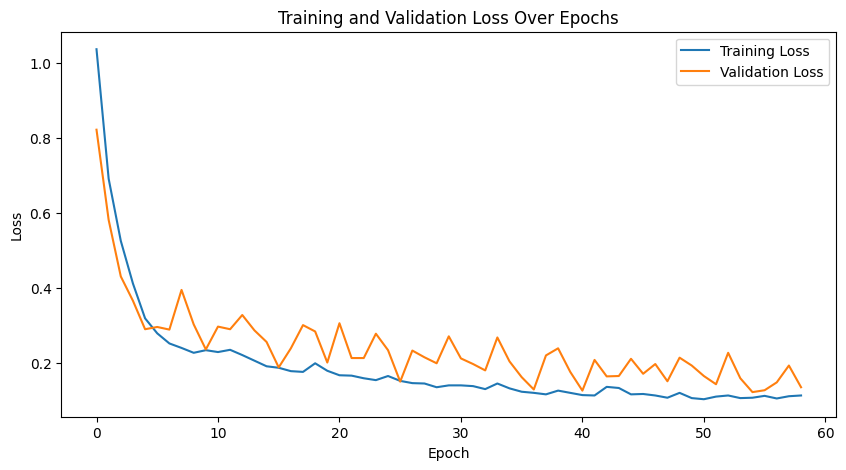

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

plt.show()

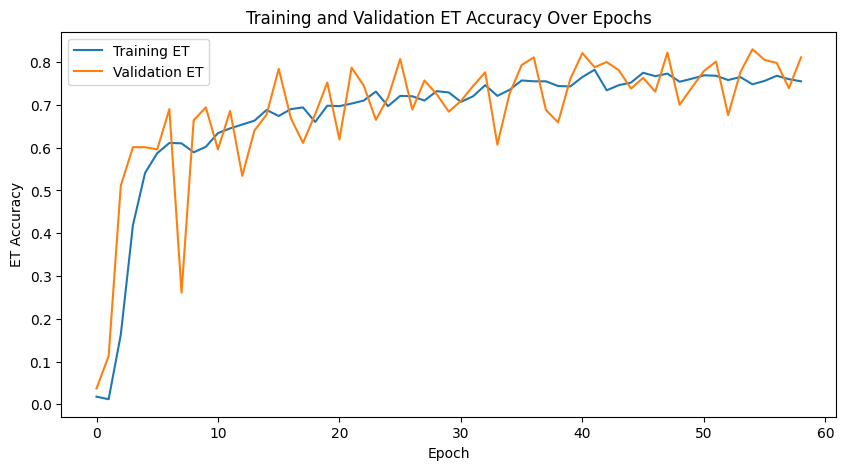

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(train_ET, label='Training ET')
plt.plot(valid_ET, label='Validation ET')

plt.xlabel('Epoch')
plt.ylabel('ET Accuracy')
plt.title('Training and Validation ET Accuracy Over Epochs')
plt.legend()

plt.show()

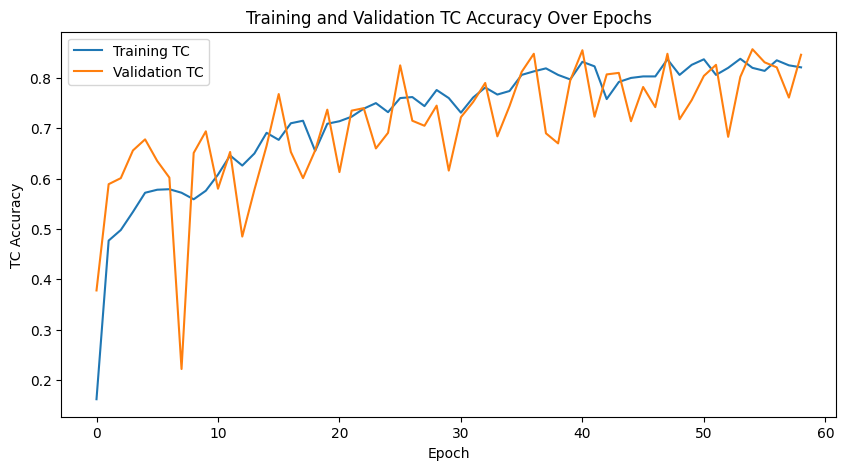

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(train_TC, label='Training TC')
plt.plot(valid_TC, label='Validation TC')

plt.xlabel('Epoch')
plt.ylabel('TC Accuracy')
plt.title('Training and Validation TC Accuracy Over Epochs')
plt.legend()

plt.show()

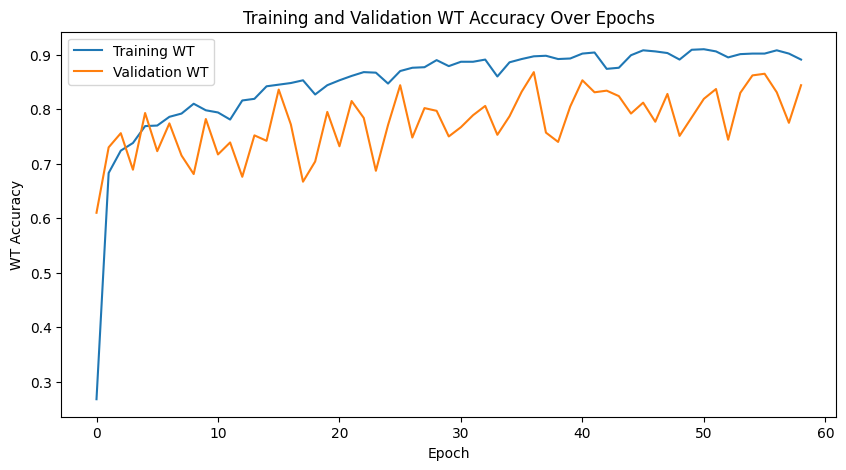

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(train_WT, label='Training WT')
plt.plot(valid_WT, label='Validation WT')

plt.xlabel('Epoch')
plt.ylabel('WT Accuracy')
plt.title('Training and Validation WT Accuracy Over Epochs')
plt.legend()

plt.show()

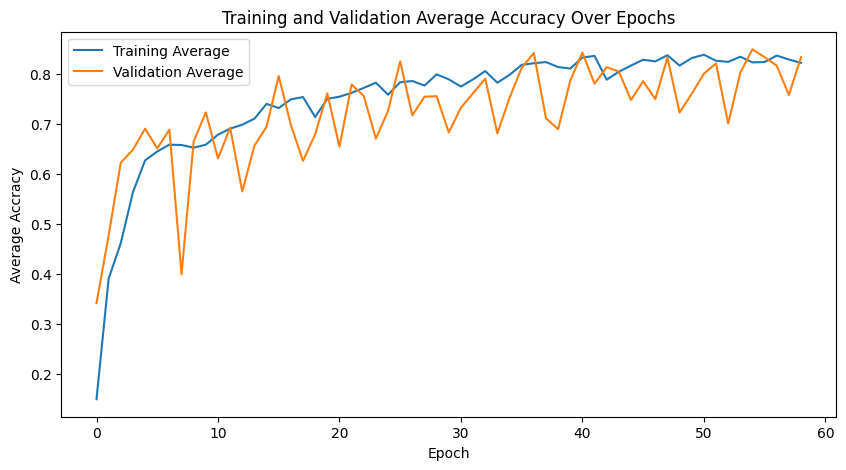

In [7]:
train_mean = []
val_mean = []
for wt, tc, et in zip(train_WT, train_TC, train_ET):
    mean_value = (wt + tc + et) / 3
    train_mean.append(mean_value)
for wt, tc, et in zip(valid_WT, valid_TC, valid_ET):
    mean_value = (wt + tc + et) / 3
    val_mean.append(mean_value)
    
plt.figure(figsize=(10, 5))
plt.plot(train_mean, label='Training Average')
plt.plot(val_mean, label='Validation Average')

plt.xlabel('Epoch')
plt.ylabel('Average Accracy')
plt.title('Training and Validation Average Accuracy Over Epochs')
plt.legend()

plt.show()

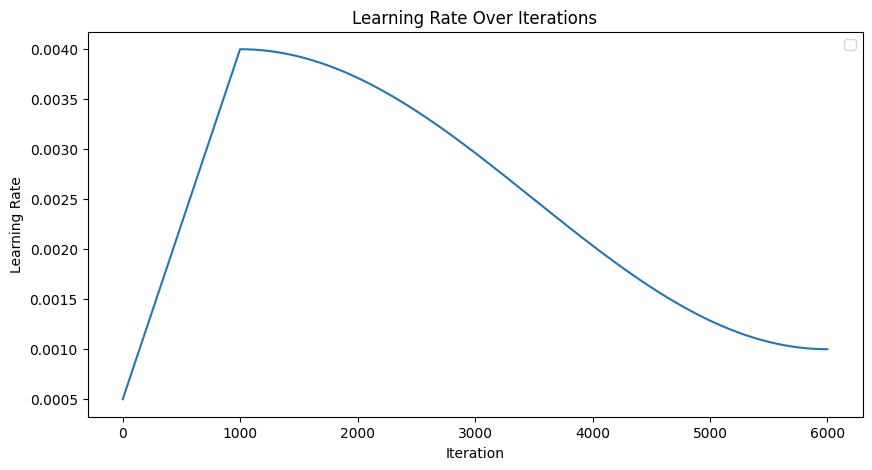

In [7]:
class Config:
    def __init__(self):
        self.epochs = 60
        self.warmup_epochs = 10
        self.batch_size = 1
        self.lr = 0.004
        self.min_lr = 0.001

args = Config()

def cosine_scheduler(base_value, final_value, epochs, niter_per_ep, warmup_epochs=0, start_warmup_value=0.):
    warmup_schedule = np.array([])
    warmup_iters = warmup_epochs * niter_per_ep
    if warmup_epochs > 0:
        warmup_schedule = np.linspace(start_warmup_value, base_value, warmup_iters)

    iters = np.arange(epochs * niter_per_ep - warmup_iters)
    schedule = final_value + 0.5 * (base_value - final_value) * (1 + np.cos(np.pi * iters / len(iters)))

    schedule = np.concatenate((warmup_schedule, schedule))
    assert len(schedule) == epochs * niter_per_ep
    return schedule

scheduler = cosine_scheduler(base_value=args.lr,final_value=args.min_lr,epochs=args.epochs,
                                 niter_per_ep=100,warmup_epochs=args.warmup_epochs,start_warmup_value=5e-4)
plt.figure(figsize=(10, 5))
plt.plot(scheduler)

plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Over Iterations')
plt.legend()

plt.show()